In [86]:
import numpy as np
import cupy as cp
import cupyx.scipy.signal as signal
import scipy
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from astropy.modeling import models, fitting
import astropy.units as u
from astropy import constants as const
from astropy.stats import gaussian_sigma_to_fwhm,gaussian_fwhm_to_sigma

import datetime
import pickle
import importlib
import json
import time
import glob
from skimage.metrics import structural_similarity as ssim


In [6]:
g1 = models.Gaussian1D(amplitude=10, mean=0, stddev=.3)

In [7]:
x=np.linspace(-1,1,100,endpoint=True)

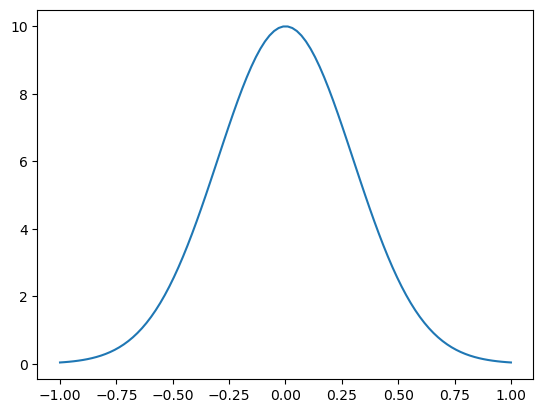

In [45]:
def gaussian_fit(x, y):
    '''
    Fit a Gaussian function to the given irradiance data.

    Parameters
    ----------
    irradiance : (12,) ndarray
        A 1D array of irradiance data to fit the Gaussian function to.

    Returns
    -------
    float
        The mean value of the fitted Gaussian function.

    Notes
    -----
    The function uses the astropy modeling and fitting library to perform the fitting. It sets the initial parameters of the Gaussian function to amplitude=1E9, mean=0.05, and stddev=0.0424, and uses the LevMarLSQFitter algorithm for fitting.

    The function also imports a pre-defined list of wavelengths from the constant module, which is used to evaluate the fitted Gaussian function.

    '''
    
    # Perform the curve fitting


    #check whether input contain nan
    try:
        if np.any(np.isnan(y)):
            raise ValueError("Input data contains NaN values.")

        p0 = [np.max(y), x[np.argmax(y)], 1]  # Initial guess for the parameters [amplitude, mean, stddev]
        popt, pcov = curve_fit(gaussian_function, x, y, p0=p0)


        return popt, pcov

    except :
        return np.full((3, ), np.nan), np.full((3, 3), np.nan)



def gaussian_function(x, amplitude, mean, stddev):
    # A refers to Amplitude, the peak value!   not the integrated area!
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

In [82]:
x=np.linspace(-3,3,100,endpoint=True)

y1=models.Gaussian1D(amplitude=1, mean=0, stddev=1)+\
    models.Gaussian1D(amplitude=.1, mean=0.1, stddev=1)

y2=models.Gaussian1D(amplitude=1, mean=0, stddev=1)+\
    models.Gaussian1D(amplitude=.1, mean=0.1, stddev=1.1)

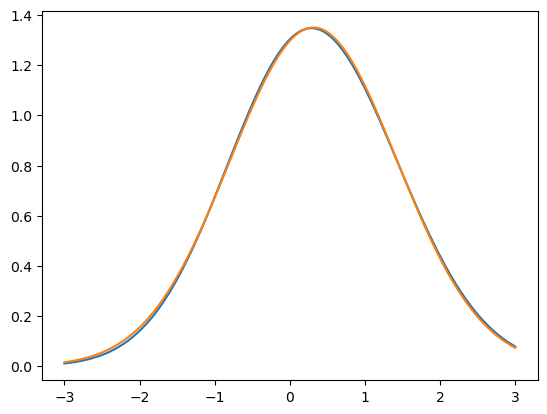

In [69]:
popt,_=gaussian_fit(x,y1(x))

fig,ax=plt.subplots()
ax.plot(x,y1(x))

fitted_y=gaussian_function(x,*popt)
ax.plot(x,fitted_y,label='fitted')

In [54]:
popt,_=gaussian_fit(x,y2(x))
popt

array([1.0859873 , 0.02463116, 1.07267529])

In [83]:
gaussian_fit(x,y1(x))

(array([1.09954617, 0.00907398, 1.00041261]),
 array([[ 1.74470013e-12, -5.21553480e-17, -1.06055843e-12],
        [-5.21553480e-17,  1.92464697e-12,  1.07648248e-16],
        [-1.06055843e-12,  1.07648248e-16,  1.93056104e-12]]))

In [84]:
gaussian_fit(x,y2(x))

(array([1.09930458, 0.00864283, 1.00938411]),
 array([[ 1.20577383e-08, -3.90545588e-13, -7.39927359e-09],
        [-3.90545588e-13,  1.35460089e-08,  8.13749655e-13],
        [-7.39927359e-09,  8.13749655e-13,  1.35936534e-08]]))

In [85]:
1/1.1 *0.1

0.09090909090909091